# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Your objective is to build a series of scatter plots to showcase the following relationships:


Temperature (F) vs. Latitude
Humidity (%) vs. Latitude
Cloudiness (%) vs. Latitude
Wind Speed (mph) vs. Latitude


Your final notebook must:


Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save both a CSV of all data retrieved and png images for each scatter plot.

In [51]:
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#Only Set to 15
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#Only Set to 15
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities
#Plots are listed in Imperial
units = "imperial"
#Manual API option
#api_key = "575be4a8306d0d32bee4173eadc6482c"

In [54]:
# Test for city of London to see if URL and API work
base_url = "http://api.openweathermap.org/data/2.5/weather?"
query_url_test = f"{base_url}appid={api_key}&units={units}&q=london"
response=requests.get(query_url_test).json()
response

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 57.67,
  'pressure': 1016,
  'humidity': 82,
  'temp_min': 54,
  'temp_max': 61},
 'visibility': 10000,
 'wind': {'speed': 7.38, 'deg': 270.416},
 'clouds': {'all': 38},
 'dt': 1563668105,
 'sys': {'type': 1,
  'id': 1502,
  'message': 0.0114,
  'country': 'GB',
  'sunrise': 1563682071,
  'sunset': 1563739535},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [55]:
# Create empty lists to append the API data into lists 
city_name = []
city_id = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 0
set= 1
count= 0

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:
    
    #used to count to 50 and reset
    if count == 50:
        #sets a sleep period for api
       time.sleep(1)
       count = 0
       record = 0
       set+=1
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{base_url}appid={api_key}&units={units}&q={city}").json()
        city_name.append(response["name"])
        city_id.append(response["id"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
                
        # Increase counter by one 
        count += 1
        record += 1
        
        #Print log of each city as it's being processed with the city name.
        print(f"Processing Record {record} of Set {set} | {city}")
        
# If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    
# Log file print statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | roma
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | laguna
Processing Record 8 of Set 1 | makakilo city
Processing Record 9 of Set 1 | saldanha
City not found. Skipping...
Processing Record 10 of Set 1 | manggar
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | caucaia
Processing Record 15 of Set 1 | mayo
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | chokurdakh
City not found. Skipping...
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | taman
Processing Record 20 of Set 1 | havelock
Processing Record 21 of Set 1 | viedma
City not found. Skipping...
Processing Record 22 of Set 1 

Processing Record 38 of Set 4 | sola
Processing Record 39 of Set 4 | abu dhabi
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | mar del plata
Processing Record 42 of Set 4 | kamina
Processing Record 43 of Set 4 | corn island
Processing Record 44 of Set 4 | bandarbeyla
Processing Record 45 of Set 4 | ugoofaaru
Processing Record 46 of Set 4 | coahuayana
Processing Record 47 of Set 4 | pisco
City not found. Skipping...
Processing Record 48 of Set 4 | caravelas
Processing Record 49 of Set 4 | chuy
City not found. Skipping...
City not found. Skipping...
Processing Record 50 of Set 4 | severo-kurilsk
Processing Record 1 of Set 5 | rondonopolis
City not found. Skipping...
Processing Record 2 of Set 5 | guerrero negro
City not found. Skipping...
Processing Record 3 of Set 5 | ixtapa
Processing Record 4 of Set 5 | tombouctou
Processing Record 5 of Set 5 | kaeo
Processing Record 6 of Set 5 | lompoc
Processing Record 7 of Set 5 | bosaso
Processing Record 8 of Set 5 | lahat

Processing Record 24 of Set 8 | pundaguitan
Processing Record 25 of Set 8 | tangjiazhuang
Processing Record 26 of Set 8 | ilulissat
Processing Record 27 of Set 8 | saurimo
Processing Record 28 of Set 8 | gambela
Processing Record 29 of Set 8 | katsuura
Processing Record 30 of Set 8 | heyang
Processing Record 31 of Set 8 | plattling
Processing Record 32 of Set 8 | bilibino
Processing Record 33 of Set 8 | baoro
Processing Record 34 of Set 8 | mumford
Processing Record 35 of Set 8 | ler
Processing Record 36 of Set 8 | aktau
Processing Record 37 of Set 8 | husavik
Processing Record 38 of Set 8 | clovis
Processing Record 39 of Set 8 | port macquarie
Processing Record 40 of Set 8 | nhulunbuy
Processing Record 41 of Set 8 | port lincoln
Processing Record 42 of Set 8 | araouane
Processing Record 43 of Set 8 | marquette
Processing Record 44 of Set 8 | dzilam gonzalez
City not found. Skipping...
Processing Record 45 of Set 8 | aberdeen
Processing Record 46 of Set 8 | powell
Processing Record 47 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [57]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pevek,51,RU,1563668454,91,69.70,170.27,33.04,0.36
1,Qaanaaq,95,GL,1563668429,81,77.48,-69.36,40.96,1.99
2,Tiksi,14,RU,1563668446,64,71.64,128.87,42.76,17.81
3,Rome,0,IT,1563668220,73,41.89,12.48,73.00,2.24
4,Busselton,100,AU,1563668421,51,-33.64,115.35,61.00,28.74


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

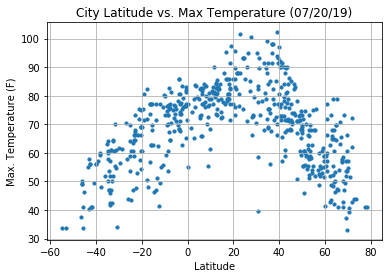

In [58]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

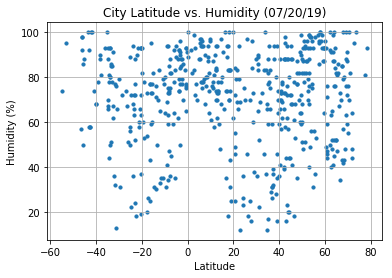

In [59]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

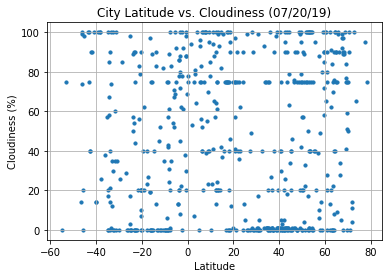

In [60]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

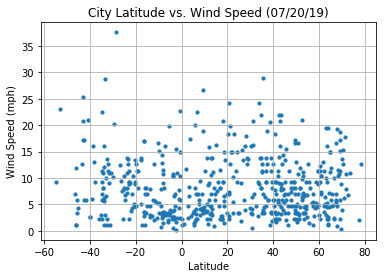

In [61]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (' + time.strftime("%m/%d/%y") + ')')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

#Three Observable Trends
1. Overall the vast majority of Cities in any latitude have wind speeds below 10 miles per hour. 
2. Cities near the equator have higher humidity than furth away from the equator. However humidity is fairly high in both hemispheres and appear to mirror each other.
3. Temperature graph has the most observable trends with the Equator and Tropics beign the warmest. The Northern Hemisphere is warm during summertime and Southern Hemisphere is cooler due to its winter season.
